In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df=pd.read_csv('data_set.csv')
df.tail(20)

,variance,skewness,curtosis,entropy,class
1352,1.489600,3.42880,-4.030900,-1.425900,1
1353,0.115920,3.22190,-3.430200,-2.845700,1
1354,-3.392400,3.35640,-0.720040,-3.523300,1
1355,-6.163200,8.70960,-0.216210,-3.634500,1
1356,-4.078600,2.92390,0.870260,-0.653890,1
1357,-2.589900,-0.39110,0.934520,0.429720,1
1358,-1.011600,-0.19038,-0.905970,0.003003,1
1359,0.066129,2.49140,-2.940100,-0.621560,1
1360,-0.247450,1.93680,-2.469700,-0.805180,1
1361,-1.573200,1.06360,-0.712320,-0.838800,1


In [5]:
df['class'].value_counts() #data set is balance w.r.t. target variable

0    762
1    610
Name: class, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<AxesSubplot:>

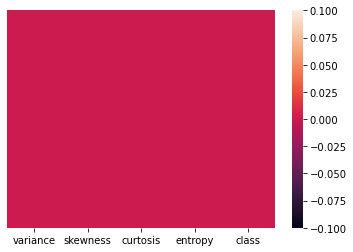

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

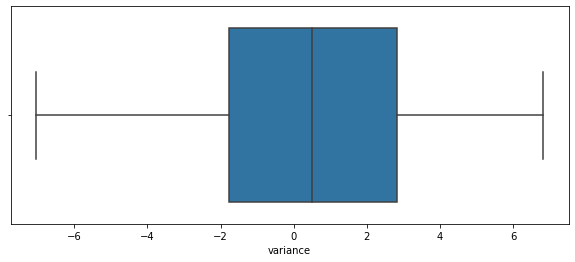

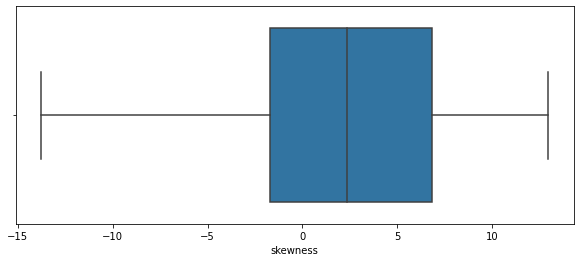

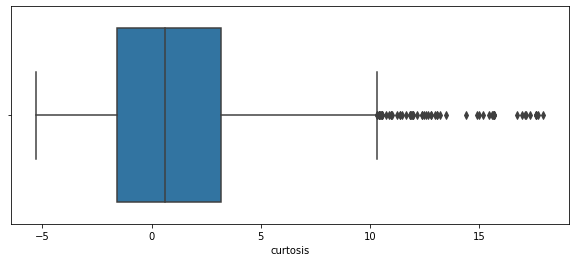

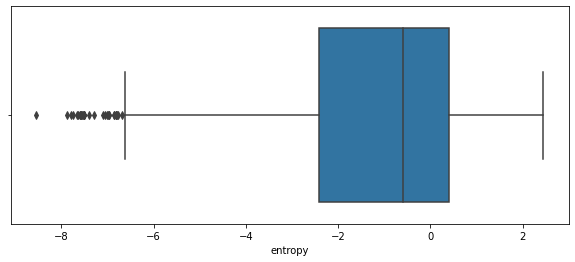

In [17]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,4))
    sns.boxplot(df[i])

In [18]:
# Outliers are in curtosis and entropy

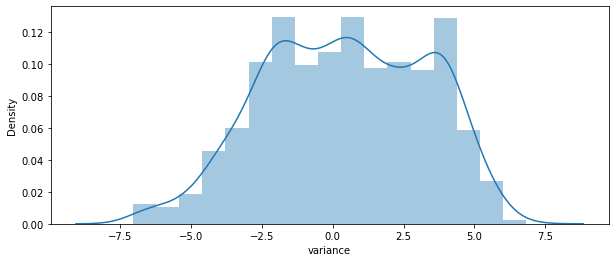

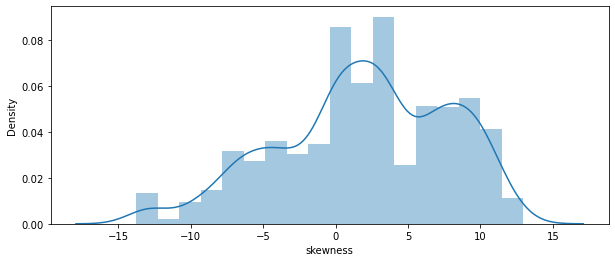

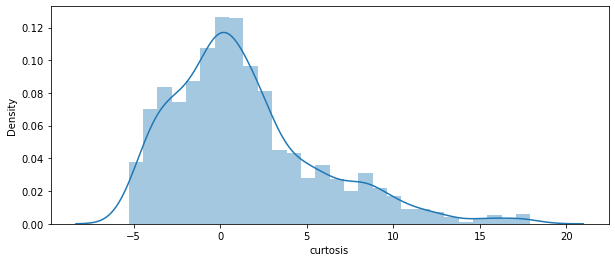

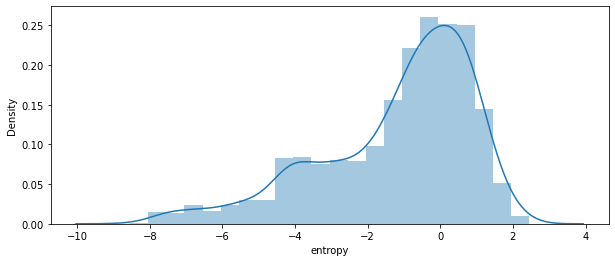

In [19]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,4))
    sns.distplot(df[i])

In [93]:
df['curtosis']=np.log(df['curtosis']+1)

In [95]:
df['curtosis'].isnull().sum()

411

In [97]:
df['curtosis'].fillna(df['curtosis'].median(),inplace=True)

<AxesSubplot:xlabel='curtosis', ylabel='Density'>

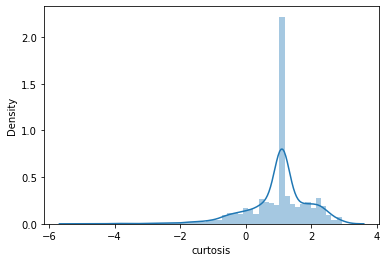

In [98]:
sns.distplot(df['curtosis'])

In [88]:
df['curtosis'].fillna(df['curtosis'].mean(),inplace=True)

In [89]:
df['curtosis'].head()

0    0.843319
1    0.843319
2    0.843319
3    0.843319
4    0.843319
Name: curtosis, dtype: float64

<AxesSubplot:xlabel='curtosis', ylabel='Density'>

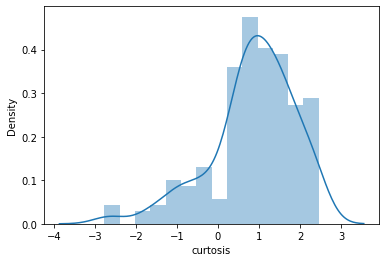

In [62]:
sns.distplot(np.log(df['curtosis']+(-6.2861)))

In [64]:
df['entropy'].sort_values(ascending=True)

465   -8.5482
581   -7.8719
291   -7.7853
394   -7.7581
740   -7.6612
        ...  
621    2.0862
888    2.1353
105    2.1547
540    2.1625
413    2.4495
Name: entropy, Length: 1372, dtype: float64

In [68]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:ylabel='Density'>

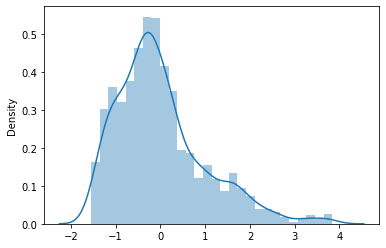

In [73]:
std=StandardScaler()
sns.distplot(std.fit_transform()

In [81]:
x=np.log(df['curtosis']+(3))

In [82]:
x

0      -1.646621
1      -0.613597
2       1.594162
3            NaN
4       2.024431
          ...   
1367    0.438190
1368    2.248910
1369    3.024961
1370    2.733913
1371    1.737690
Name: curtosis, Length: 1372, dtype: float64

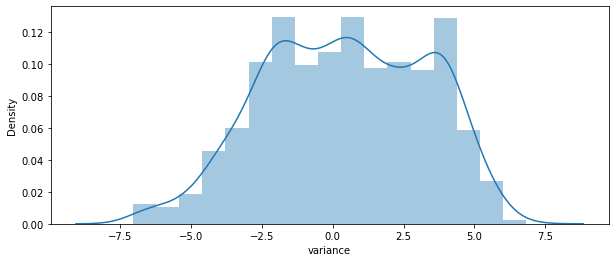

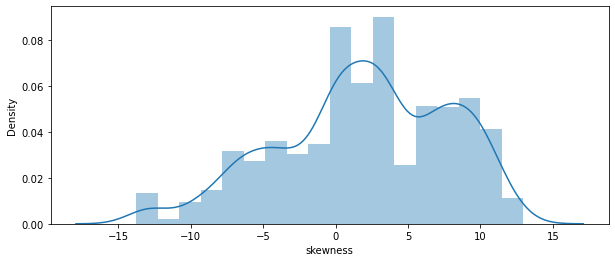

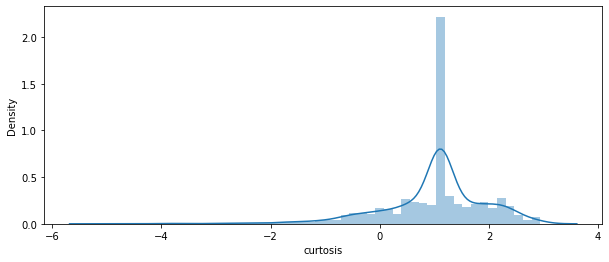

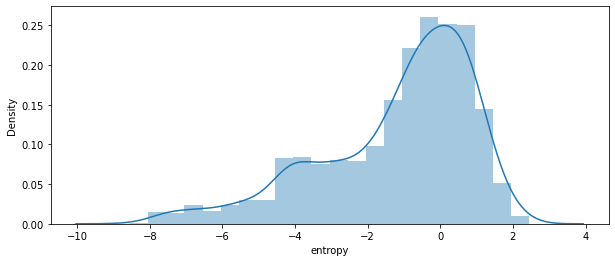

In [99]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,4))
    sns.distplot(df[i])

In [100]:
for i in ['variance','skewness','entropy']:
    df[i]=np.log(df[i]+1)

In [102]:
df.head()

,variance,skewness,curtosis,entropy,class
0,1.530741,2.268625,1.102471,-0.592379,0
1,1.713059,2.215654,1.102471,NaN,0
2,1.582272,NaN,1.073021,0.101157,0
3,1.494386,2.353544,1.102471,NaN,0
4,0.284607,NaN,1.717718,-4.491842,0


In [103]:
for i in ['variance','skewness','entropy']:
    df[i].fillna(df[i].median(),inplace=True)

In [104]:
df.head()

,variance,skewness,curtosis,entropy,class
0,1.530741,2.268625,1.102471,-0.592379,0
1,1.713059,2.215654,1.102471,0.204331,0
2,1.582272,1.577028,1.073021,0.101157,0
3,1.494386,2.353544,1.102471,0.204331,0
4,0.284607,1.577028,1.717718,-4.491842,0


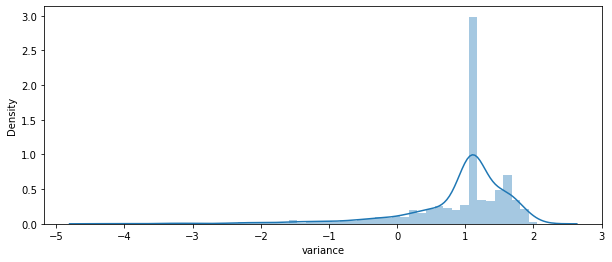

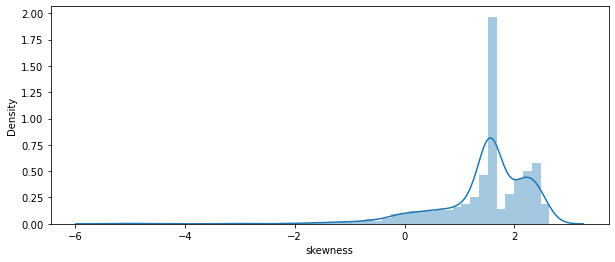

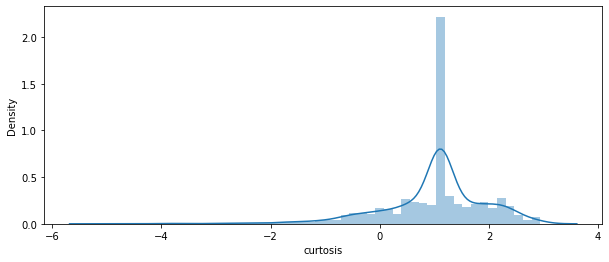

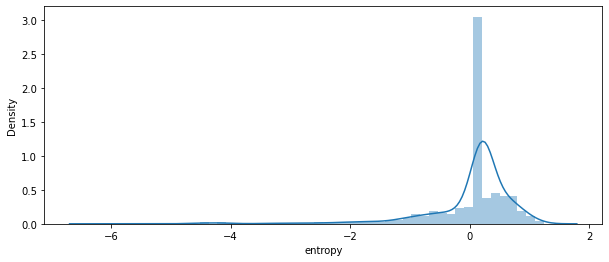

In [105]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,4))
    sns.distplot(df[i])

In [106]:
std=StandardScaler()
std_x=std.fit_transform(df[['variance','skewness','curtosis','entropy']])

In [107]:
std_x

array([[ 0.76757686,  0.93141197,  0.10428028, -0.79026676],
       [ 0.99051268,  0.87056424,  0.10428028,  0.22598489],
       [ 0.83058858,  0.13697876,  0.07305937,  0.0943797 ],
       ...,
       [ 0.23559823,  0.13697876,  2.03402882,  0.22598489],
       [ 0.23559823,  0.13697876,  1.68624438,  0.22598489],
       [ 0.23559823, -2.90716453,  0.31797976,  0.96828668]])

In [109]:
X=pd.DataFrame(std_x,columns=df.columns[:-1])

In [111]:
Y=df['class']

In [110]:
X

,variance,skewness,curtosis,entropy
0,0.767577,0.931412,0.104280,-0.790267
1,0.990513,0.870564,0.104280,0.225985
2,0.830589,0.136979,0.073059,0.094380
3,0.723123,1.028958,0.104280,0.225985
4,-0.756178,0.136979,0.756511,-5.764264
...,...,...,...,...
1367,-0.687407,-0.693474,0.104280,-1.080384
1368,0.235598,0.136979,1.068361,0.340369
1369,0.235598,0.136979,2.034029,0.225985
1370,0.235598,0.136979,1.686244,0.225985


In [112]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

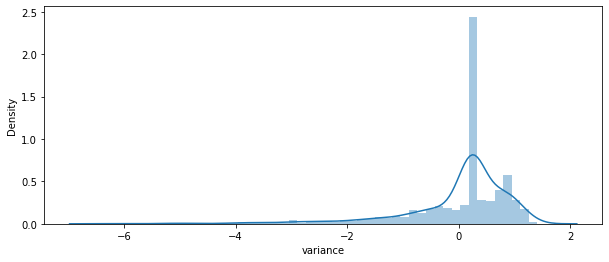

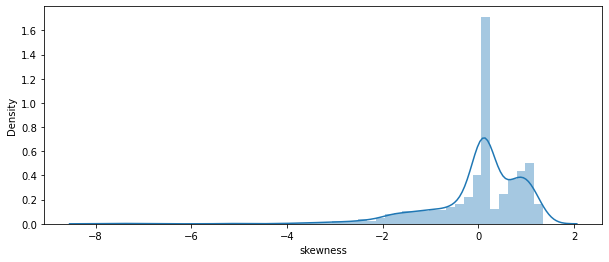

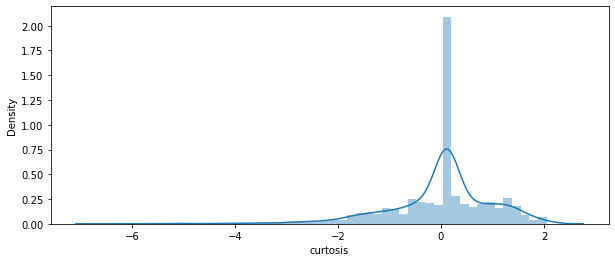

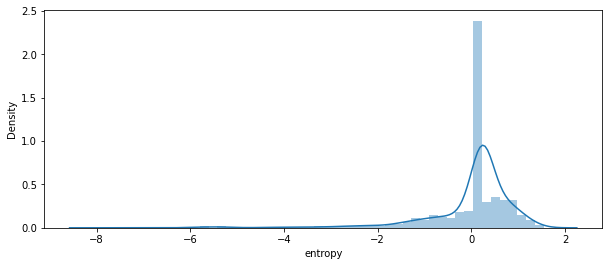

In [114]:
for i in X.columns:
    plt.figure(figsize=(10,4))
    sns.distplot(X[i])

In [115]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.33,random_state=101)

In [121]:
x_train

,variance,skewness,curtosis,entropy
929,0.235598,-0.182525,-0.447925,-1.977076
1191,0.235598,0.136979,1.209423,0.647991
319,0.575537,-0.320878,-0.160584,-0.082853
999,0.235598,0.136979,1.603551,0.225985
743,1.043731,-0.530585,-1.120740,1.130351
...,...,...,...,...
973,-0.123022,0.149194,0.104280,0.225985
75,0.358163,0.062435,-0.582559,0.412075
599,0.846368,0.136979,0.172872,0.308001
1361,0.235598,-0.842371,-2.385264,-2.362688


In [122]:
y_train

929     1
1191    1
319     0
999     1
743     0
       ..
973     1
75      0
599     0
1361    1
863     1
Name: class, Length: 919, dtype: int64

## Algorithm

**1) RandomForest**

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
rf_predicted=rf_model.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score,classification_report

In [128]:
rf_score=accuracy_score(y_test,rf_predicted)

In [131]:
rf_score*100

99.11699779249447

**2) Decision Tree**

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
dt_predict_y=dt_model.predict(x_test)

In [170]:
x_test

,variance,skewness,curtosis,entropy
194,0.235598,1.304757,-0.499428,0.225985
622,1.095458,-2.541200,-0.631527,0.915373
1063,0.235598,0.136979,1.378252,0.086905
390,-1.655247,0.885763,0.104280,0.225985
327,0.915615,1.022159,0.104280,0.225985
...,...,...,...,...
719,0.143758,-3.361655,0.933695,1.029935
103,0.690620,0.136979,0.637962,-0.380540
996,0.235598,-0.380928,-1.733772,0.225985
1086,-2.309550,0.136979,0.796190,0.915373


In [171]:
df.iloc[1063,:]

variance   -2.006600
skewness   -6.719000
curtosis    9.016200
entropy     0.099985
class       1.000000
Name: 1063, dtype: float64

In [166]:
dt_predict_y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,

In [138]:
dt_score=accuracy_score(y_test,dt_predict_y)

In [139]:
dt_score*100

97.57174392935983

In [141]:
print(classification_report(y_test,dt_predict_y))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       262
           1       0.95      0.99      0.97       191

    accuracy                           0.98       453
   macro avg       0.97      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
confusion_matrix(y_test,dt_predict_y)

array([[253,   9],
       [  2, 189]], dtype=int64)

**We will take the decision tree algorithm for the model selection**

**Saving into pickle file**

In [146]:
import pickle

In [147]:
# opening the pickle file in write binary mode. If the file is not present with that name then it will create a new one

with open('classifier.pkl','wb') as pk_file:
    pickle.dump(dt_model,pk_file)

In [149]:
dt_model.predict([[1,2,3,4]])

array([0], dtype=int64)

In [154]:
dt_model.predict([[1,42,43,4]])

array([0], dtype=int64)

In [155]:
dt_model.predict([[1,1,1,1]])

array([0], dtype=int64)

In [158]:
dt_model.predict([[1,2,0.4,0.4]])

array([0], dtype=int64)

# Streamlit

In [161]:
XY=pd.concat([X,Y],axis=1)

In [163]:
XY.to_csv('banknote_dataXY.csv',index=False)

In [172]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1
